In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV, RidgeCV, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import patsy
import warnings
from sklearn.base import BaseEstimator, clone
import statsmodels.api as sm
warnings.simplefilter('ignore')
np.random.seed(1234)

In [54]:
# simple scalar regression "population" dgp
n = 10000
W = np.random.uniform(0, 1, size=(n, 1))
y = np.exp(2 * W[:, 0])
grid = np.linspace(0, 1, 1000).reshape(-1, 1)

In [55]:
# Let's fit BLPs with polynomial features
dtr = lambda d: DecisionTreeRegressor(max_depth=d)
pred1 = dtr(5).fit(W, y).predict(grid)

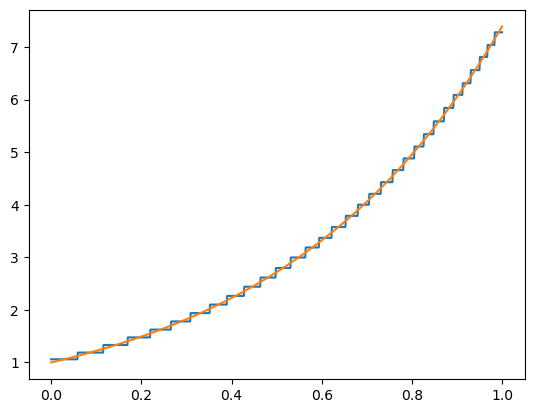

In [56]:
# even 3rd degree polynomial is good enough
plt.plot(grid, pred1)
plt.plot(grid, np.exp(2 * grid))
plt.show()

In [57]:
# Now let's go to finite sample and noisy data
n = 5000
W = np.random.uniform(0, 1, size=(n, 1))
y = np.exp(2 * W[:, 0]) + np.random.normal(0, 5, size=n)
grid = np.linspace(0, 1, 1000).reshape(-1, 1)

In [58]:
# Let's fit BLPs with polynomial features
dtr = lambda d: DecisionTreeRegressor(max_depth=d)
pred1 = dtr(5).fit(W, y).predict(grid)

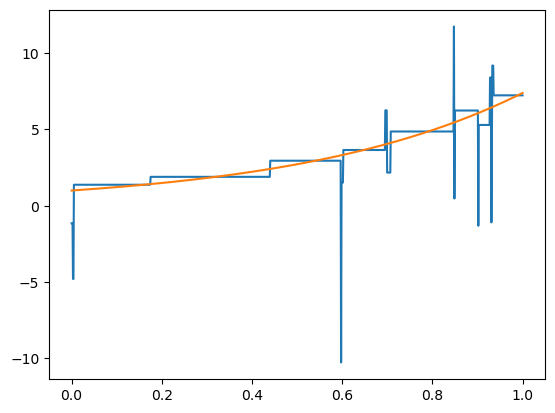

In [59]:
# It is very noisy!
plt.plot(grid, pred1)
plt.plot(grid, np.exp(2 * grid))
plt.show()

In [80]:
# Let's fit BLPs with polynomial features
dtr = lambda d: RandomForestRegressor(n_estimators=1000, max_depth=d)
pred1 = dtr(10).fit(W, y).predict(grid)

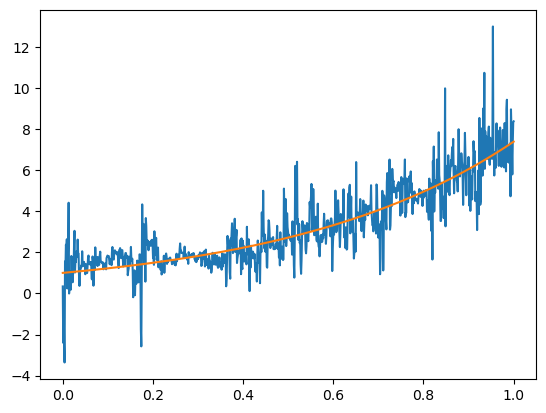

In [81]:
# It is very noisy!
plt.plot(grid, pred1)
plt.plot(grid, np.exp(2 * grid))
plt.show()

In [92]:
from econml.grf import RegressionForest

# Let's fit BLPs with polynomial features
dtr = lambda d: RegressionForest(n_estimators=1000, 
                                 honest=True,
                                 max_samples=.5,
                                 inference=False,
                                 max_depth=d, min_samples_split=2, min_samples_leaf=1)
pred1 = dtr(10).fit(W, y).predict(grid)

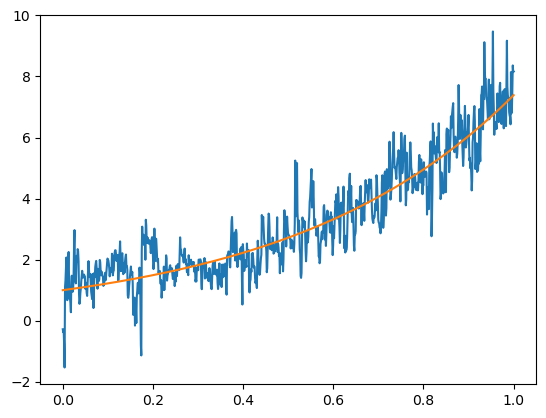

In [93]:
# It is very noisy!
plt.plot(grid, pred1)
plt.plot(grid, np.exp(2 * grid))
plt.show()

In [74]:
# Let's fit BLPs with polynomial features
dtr = lambda d: GradientBoostingRegressor(n_estimators=1000, max_depth=d, n_iter_no_change=5)
pred1 = dtr(2).fit(W, y).predict(grid)

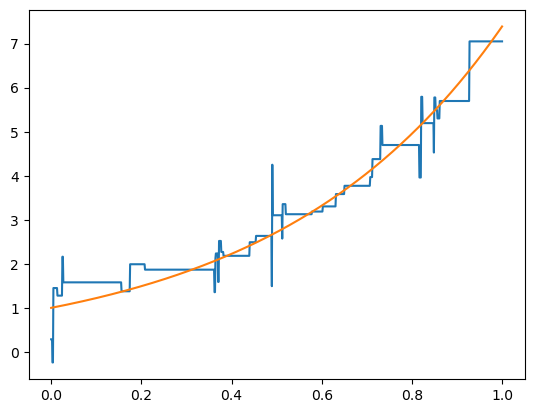

In [75]:
# It is very noisy!
plt.plot(grid, pred1)
plt.plot(grid, np.exp(2 * grid))
plt.show()

In [95]:
from sklearn.neural_network import MLPRegressor
# Let's fit BLPs with polynomial features
dtr = lambda d: MLPRegressor()
pred1 = dtr(2).fit(W, y).predict(grid)

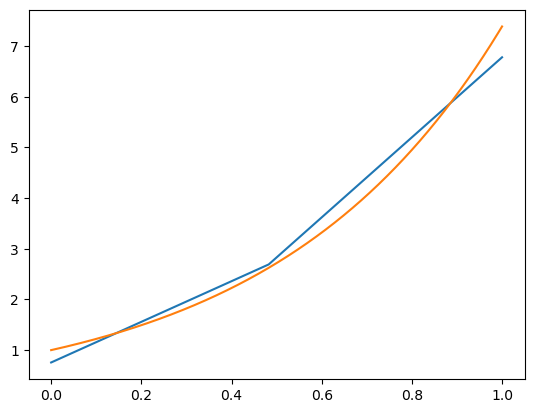

In [96]:
# It is very noisy!
plt.plot(grid, pred1)
plt.plot(grid, np.exp(2 * grid))
plt.show()

In [99]:
from sklearn.ensemble import StackingRegressor
# Let's fit BLPs with polynomial features
est1 = ('nnet', MLPRegressor())
est2 = ('ols', LinearRegression())
est3 = ('polylasso', make_pipeline(PolynomialFeatures(degree=3, include_bias=False), LassoCV()))
est4 = ('rf', RandomForestRegressor(min_samples_leaf=20))
est5 = ('gbf', GradientBoostingRegressor(n_estimators=50, max_depth=2, n_iter_no_change=5))
stack = StackingRegressor([est1, est2, est3, est4, est5], final_estimator=LinearRegression(), n_jobs=-1)
pred1 = stack.fit(W, y).predict(grid)

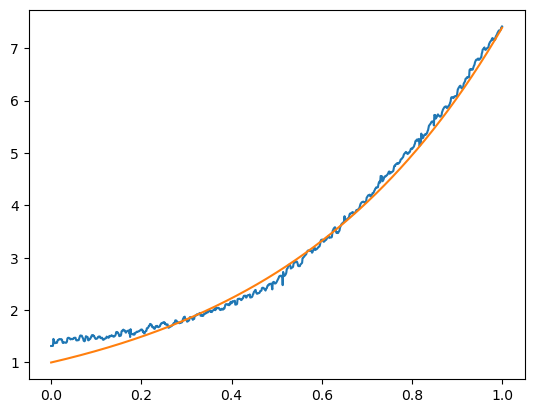

In [100]:
# It is very noisy!
plt.plot(grid, pred1)
plt.plot(grid, np.exp(2 * grid))
plt.show()

In [105]:
from flaml import AutoML

automl = AutoML(task='regression', time_budget=10, early_stop=True,
                eval_method='cv', n_splits=3, metric='r2',
                verbose=3)
automl.fit(W, y)
pred1 = automl.predict(grid)

[flaml.automl.automl: 02-09 13:00:13] {2715} INFO - task = regression
[flaml.automl.automl: 02-09 13:00:13] {2717} INFO - Data split method: uniform
[flaml.automl.automl: 02-09 13:00:13] {2720} INFO - Evaluation method: cv
[flaml.automl.automl: 02-09 13:00:13] {2847} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 02-09 13:00:13] {2993} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 02-09 13:00:13] {3322} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 02-09 13:00:13] {3460} INFO - Estimated sufficient time budget=500s. Estimated necessary time budget=4s.
[flaml.automl.automl: 02-09 13:00:13] {3507} INFO -  at 0.1s,	estimator lgbm's best error=0.9386,	best estimator lgbm's best error=0.9386
[flaml.automl.automl: 02-09 13:00:13] {3322} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 02-09 13:00:13] {3507} INFO -  at 0.1s,	estimator lgbm's best error=0.9386,	best estimator 

[flaml.automl.automl: 02-09 13:00:17] {3507} INFO -  at 3.8s,	estimator extra_tree's best error=0.8900,	best estimator extra_tree's best error=0.8900
[flaml.automl.automl: 02-09 13:00:17] {3322} INFO - iteration 34, current learner lgbm
[flaml.automl.automl: 02-09 13:00:17] {3507} INFO -  at 3.9s,	estimator lgbm's best error=0.8910,	best estimator extra_tree's best error=0.8900
[flaml.automl.automl: 02-09 13:00:17] {3322} INFO - iteration 35, current learner rf
[flaml.automl.automl: 02-09 13:00:17] {3507} INFO -  at 4.2s,	estimator rf's best error=0.8935,	best estimator extra_tree's best error=0.8900
[flaml.automl.automl: 02-09 13:00:17] {3322} INFO - iteration 36, current learner extra_tree
[flaml.automl.automl: 02-09 13:00:18] {3507} INFO -  at 4.7s,	estimator extra_tree's best error=0.8880,	best estimator extra_tree's best error=0.8880
[flaml.automl.automl: 02-09 13:00:18] {3322} INFO - iteration 37, current learner xgboost
[flaml.automl.automl: 02-09 13:00:18] {3507} INFO -  at 4.8

[flaml.automl.automl: 02-09 13:00:22] {3507} INFO -  at 8.9s,	estimator lgbm's best error=0.8910,	best estimator extra_tree's best error=0.8880
[flaml.automl.automl: 02-09 13:00:22] {3322} INFO - iteration 69, current learner xgboost
[flaml.automl.automl: 02-09 13:00:22] {3507} INFO -  at 9.0s,	estimator xgboost's best error=0.8929,	best estimator extra_tree's best error=0.8880
[flaml.automl.automl: 02-09 13:00:22] {3322} INFO - iteration 70, current learner extra_tree
[flaml.automl.automl: 02-09 13:00:22] {3507} INFO -  at 9.2s,	estimator extra_tree's best error=0.8880,	best estimator extra_tree's best error=0.8880
[flaml.automl.automl: 02-09 13:00:22] {3322} INFO - iteration 71, current learner xgboost
[flaml.automl.automl: 02-09 13:00:22] {3507} INFO -  at 9.2s,	estimator xgboost's best error=0.8929,	best estimator extra_tree's best error=0.8880
[flaml.automl.automl: 02-09 13:00:22] {3322} INFO - iteration 72, current learner extra_tree
[flaml.automl.automl: 02-09 13:00:23] {3507} I

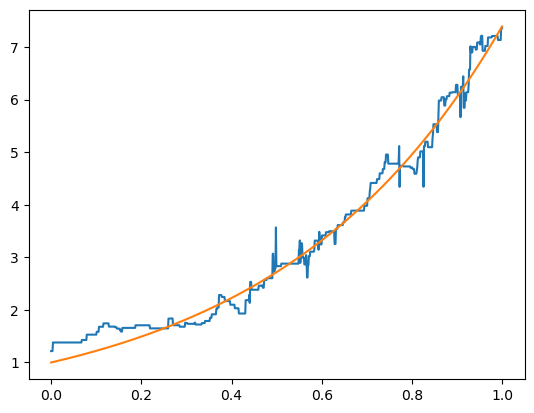

In [106]:
# It is very noisy!
plt.plot(grid, pred1)
plt.plot(grid, np.exp(2 * grid))
plt.show()